### 1 Average rainfall (mm/hr) precipitation map for the span of five days in 0000 UTC ( 5 HDF5 files will be average since the datasets is in hourly)

In [1]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Define the folder path where your HDF5 files are located
folder_path = r'E:\My Project\0000 UTC'
# Debugging: Print the list of files in the directory
print(os.listdir(folder_path))

['3B-HHR.MS.MRG.3IMERG.20171201-S000000-E002959.0000.V06B.HDF5', '3B-HHR.MS.MRG.3IMERG.20171202-S000000-E002959.0000.V06B.HDF5', '3B-HHR.MS.MRG.3IMERG.20171203-S000000-E002959.0000.V06B.HDF5', '3B-HHR.MS.MRG.3IMERG.20171204-S000000-E002959.0000.V06B.HDF5', '3B-HHR.MS.MRG.3IMERG.20171205-S000000-E002959.0000.V06B.HDF5']


In [3]:
# Function to recursively read and print data from all datasets in an HDF5 group
def read_hdf5_group(group, indent=""):
    for key, item in group.items():
        if isinstance(item, h5py.Group):
            print(indent + f"Group: {key}")
            read_hdf5_group(item, indent + "  ")
        elif isinstance(item, h5py.Dataset):
            print(indent + f"Dataset: {key}")
            print(indent + f"Shape: {item.shape}")
            print(indent + f"Dtype: {item.dtype}")
            print(indent + f"Data:\n{item[()]}")
            print("-" * 30)

# Function to read and print data from an HDF5 file
def read_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as file:
        print("File:", file_path)
        read_hdf5_group(file)

# Iterate through the HDF5 files in the folder and read and print their data
for filename in os.listdir(folder_path):
    if filename.endswith('.HDF5'):
        file_path = os.path.join(folder_path, filename)
        read_hdf5_file(file_path)
        print("=" * 50)


File: E:\My Project\0000 UTC\3B-HHR.MS.MRG.3IMERG.20171201-S000000-E002959.0000.V06B.HDF5
Group: Grid
  Dataset: nv
  Shape: (2,)
  Dtype: int32
  Data:
[0 0]
------------------------------
  Dataset: lonv
  Shape: (2,)
  Dtype: int32
  Data:
[0 0]
------------------------------
  Dataset: latv
  Shape: (2,)
  Dtype: int32
  Data:
[0 0]
------------------------------
  Dataset: time
  Shape: (1,)
  Dtype: int32
  Data:
[1512086400]
------------------------------
  Dataset: lon
  Shape: (3600,)
  Dtype: float32
  Data:
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
------------------------------
  Dataset: lat
  Shape: (1800,)
  Dtype: float32
  Data:
[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
------------------------------
  Dataset: time_bnds
  Shape: (1, 2)
  Dtype: int32
  Data:
[[1512086400 1512088200]]
------------------------------
  Dataset: lon_bnds
  Shape: (3600, 2)
  Dtype: float32
  Data:
[[-180.      -179.9    ]
 [-179.90001 -179.8    ]
 [-179.8     -179.7    ]

In [4]:
# Function to read and preprocess the data from an HDF5 file
def preprocess_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as file:
        # Extract the precipitation data
        precipitation_data = file['Grid']['precipitationCal'][0]

        # Replace invalid values with NaN (e.g., -9999.9)
        precipitation_data[precipitation_data == -9999.9] = np.nan

        return precipitation_data

# Initialize an empty array to store the precipitation data from all files
all_precipitation_data = []

# Iterate through the HDF5 files in the folder and preprocess them
for filename in os.listdir(folder_path):
    if filename.endswith('.HDF5'):
        file_path = os.path.join(folder_path, filename)
        precipitation_data = preprocess_hdf5_file(file_path)
        all_precipitation_data.append(precipitation_data)

# Calculate the mean precipitation for the span of five days at 0000 UTC
# You can modify this part according to your specific requirements
mean_precipitation = np.nanmean(all_precipitation_data, axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_3836\3361806369.py:24: RuntimeWarning: Mean of empty slice
  mean_precipitation = np.nanmean(all_precipitation_data, axis=0)


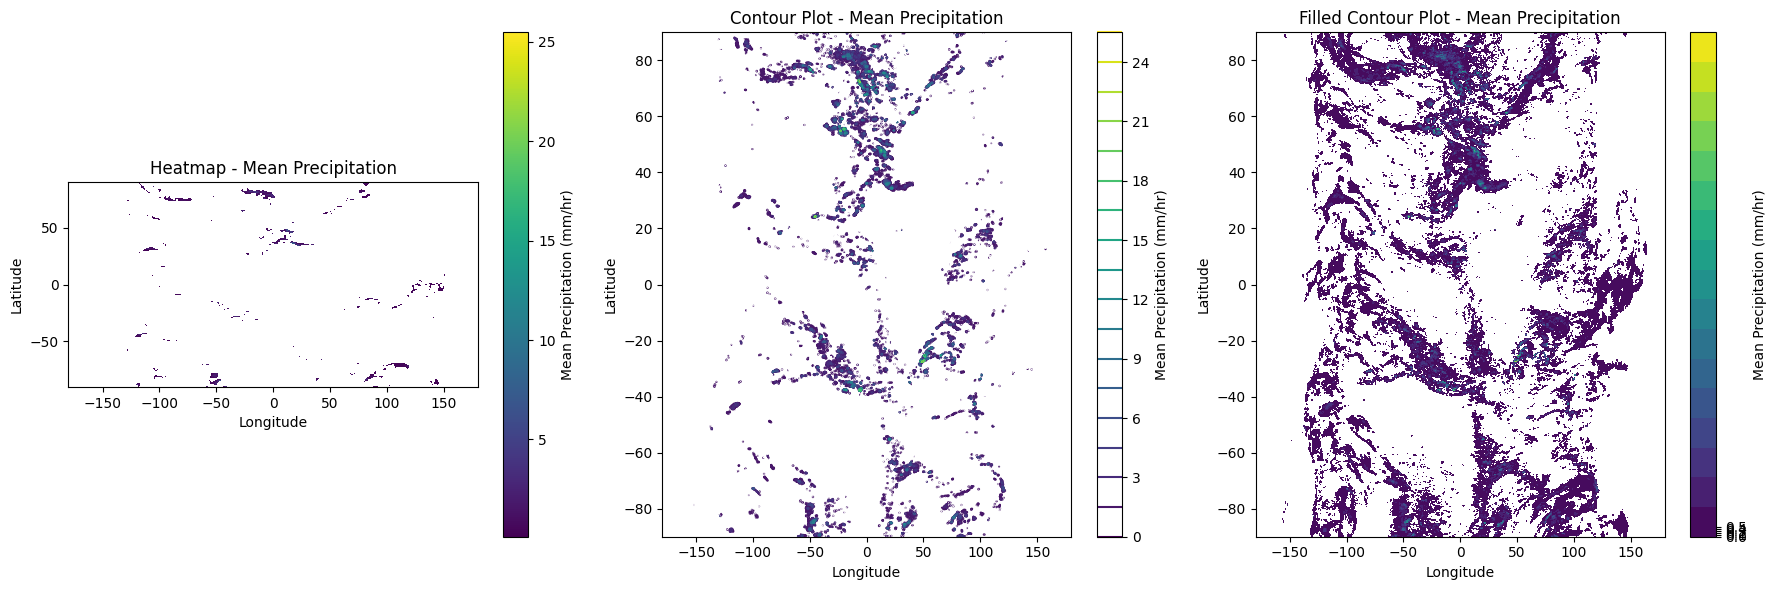

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 'mean_precipitation' data defined previously
# You can add a mask to exclude values below a certain threshold (e.g., for ocean)
threshold = 0.1  # Adjust this threshold value as needed
mean_precipitation_masked = np.ma.masked_where(mean_precipitation < threshold, mean_precipitation)

# Create subplots for different visualization styles
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Heatmap with proper extent
im = axs[0].imshow(mean_precipitation_masked, cmap='viridis', origin='lower', extent=[-180, 180, -90, 90])
axs[0].set_title('Heatmap - Mean Precipitation')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
plt.colorbar(im, ax=axs[0], label='Mean Precipitation (mm/hr)')

# Contour plot with specified levels
contour = axs[1].contour(np.linspace(-180, 180, mean_precipitation.shape[1]),
                        np.linspace(-90, 90, mean_precipitation.shape[0]),
                        mean_precipitation_masked, cmap='viridis', levels=20)
axs[1].set_title('Contour Plot - Mean Precipitation')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
plt.colorbar(contour, ax=axs[1], label='Mean Precipitation (mm/hr)')

# Filled contour plot with specified levels
filled_contour = axs[2].contourf(np.linspace(-180, 180, mean_precipitation.shape[1]),
                                np.linspace(-90, 90, mean_precipitation.shape[0]),
                                mean_precipitation_masked, cmap='viridis', levels=20)
axs[2].set_title('Filled Contour Plot - Mean Precipitation')
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')
colorbar = plt.colorbar(filled_contour, ax=axs[2], label='Mean Precipitation (mm/hr)')

# Adjust colorbar levels
colorbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])  # Adjust the tick values as needed

plt.tight_layout()
plt.show()


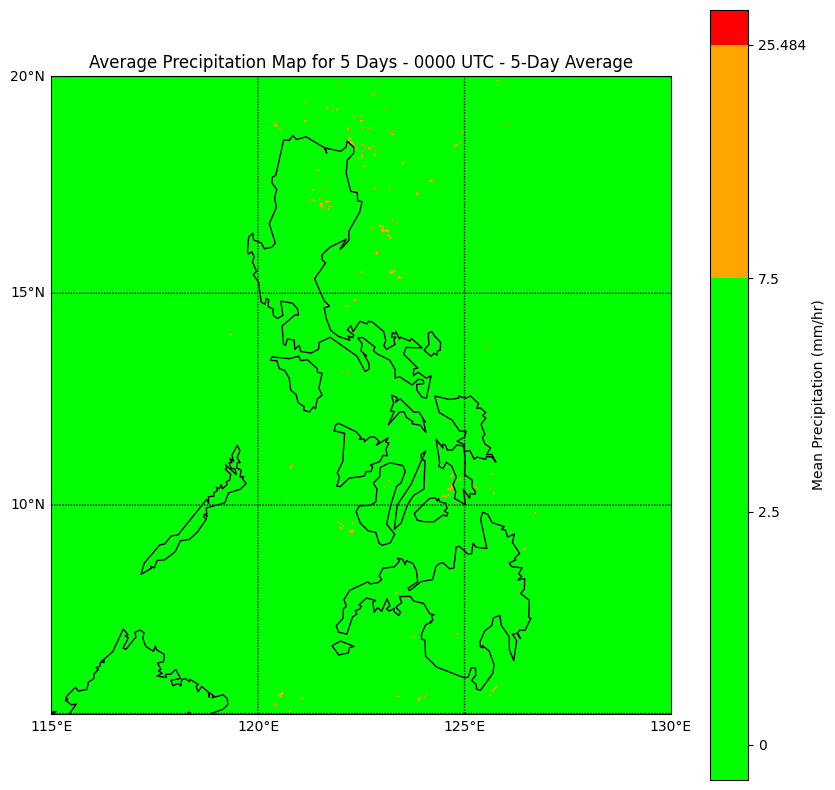

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import h5py
import os
from matplotlib.colors import ListedColormap

# Folder path containing HDF5 files
folder_path = r'E:\My Project\0000 UTC'
file_names = [
    '3B-HHR.MS.MRG.3IMERG.20171201-S000000-E002959.0000.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171202-S000000-E002959.0000.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171203-S000000-E002959.0000.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171204-S000000-E002959.0000.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171205-S000000-E002959.0000.V06B.HDF5'
]

# Create a Basemap centered on the Philippines
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', resolution='l',
            llcrnrlat=5, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=130)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Draw parallels and meridians
m.drawparallels(np.arange(0, 30, 5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(110, 140, 5), labels=[0, 0, 0, 1])

# Initialize variables to store cumulative data and count
cumulative_data = None
count = 0

# Loop through HDF5 files and accumulate data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as hdf_file:
        # Assuming that the dataset you want to plot is named 'precipitationCal'
        dataset = hdf_file['Grid']['precipitationCal'][0]

    if cumulative_data is None:
        cumulative_data = dataset
    else:
        cumulative_data += dataset

    count += 1

# Calculate the average by dividing the cumulative data by the count
average_data = cumulative_data / count

# Convert longitude and latitude to map coordinates
lon, lat = np.meshgrid(np.linspace(115, 130, average_data.shape[1]),
                       np.linspace(5, 20, average_data.shape[0]))
x, y = m(lon, lat)

# Create a land mask
land_mask = m.drawlsmask(land_color='lightblue', ocean_color='white', resolution='l')

# Create a mask for the Philippines' land
philippines_land_mask = np.ma.masked_where(land_mask == 0, land_mask)

# Apply the land mask to the average data
masked_data = np.ma.masked_where(philippines_land_mask.mask, average_data)

# Create a custom colormap with orange and red hues
colors = ['#00FF00', '#FFA500', '#FF0000']
cmap = ListedColormap(colors)

# Define custom levels for the colorbar
levels = [0, 2.5, 7.5, np.max(average_data)]

# Plot the average data on the map with contours only on the Philippines' land
c = m.contourf(x, y, masked_data, cmap=cmap, levels=levels, extend='both', vmin=0, vmax=np.max(average_data))

# Add a colorbar with custom levels and label
cbar = plt.colorbar(c, label='Mean Precipitation (mm/hr)', extendrect=True, ticks=levels)
cbar.set_ticklabels(levels)  # Customize colorbar tick labels

# Display the title for the average data
plt.title(f'Average Precipitation Map for {count} Days - 0000 UTC - 5-Day Average')

# Save the plot if needed
# plt.savefig('average_precipitation_map.png')

# Show the plot
plt.show()


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


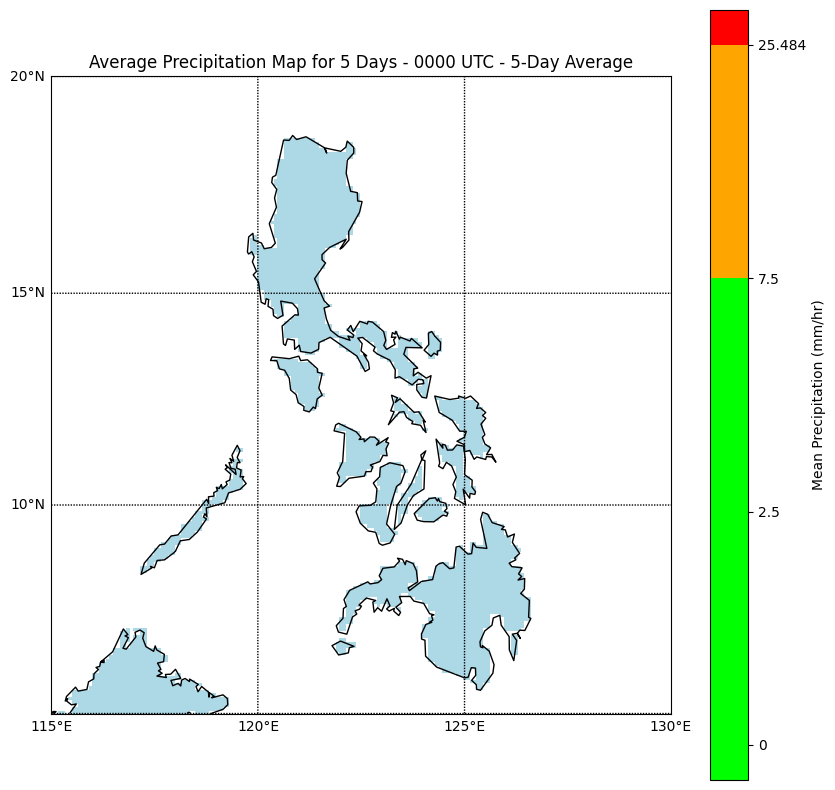

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import h5py
import os
import geopandas as gpd
from shapely.geometry import Polygon, Point
from matplotlib.colors import ListedColormap

# Load the shapefile data for land cover and water bodies
land_cover_shp = gpd.read_file('E:\My Project/Land-Cover.shp')
water_body_shp = gpd.read_file('E:\My Project/Philippine_WaterBody.shp')

# Folder path containing HDF5 files
folder_path = r'E:\My Project\0000 UTC'
file_names = [
    '3B-HHR.MS.MRG.3IMERG.20171201-S000000-E002959.0000.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171202-S000000-E002959.0000.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171203-S000000-E002959.0000.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171204-S000000-E002959.0000.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171205-S000000-E002959.0000.V06B.HDF5'
]

# Create a Basemap centered on the Philippines
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', resolution='l',
            llcrnrlat=5, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=130)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Draw parallels and meridians
m.drawparallels(np.arange(0, 30, 5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(110, 140, 5), labels=[0, 0, 0, 1])

# Initialize variables to store cumulative data and count
cumulative_data = None
count = 0

# Create a land mask for the Philippines only
philippines_polygon = Polygon([
    (117, 5), (117, 20), (130, 20), (130, 5)  # Define the corners of the Philippines' bounding box
])
land_mask = m.drawlsmask(land_color='lightblue', ocean_color='white', resolution='l')
mask_points = [Point(m(x_val, y_val)) for x_val, y_val in zip(m.boundarylons, m.boundarylats)]
mask = np.array([philippines_polygon.contains(point) for point in mask_points])

# Loop through HDF5 files and accumulate data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as hdf_file:
        # Assuming that the dataset you want to plot is named 'precipitationCal'
        dataset = hdf_file['Grid']['precipitationCal'][0]

    if cumulative_data is None:
        cumulative_data = np.zeros_like(dataset)
    cumulative_data += dataset

    count += 1

# Calculate the average by dividing the cumulative data by the count
average_data = cumulative_data / count

# Create a mask with the same shape as the data
mask_data = np.ones_like(average_data)
lon, lat = np.meshgrid(np.linspace(115, 130, mask_data.shape[1]),
                       np.linspace(5, 20, mask_data.shape[0]))
x, y = m(lon, lat)
mask_points = [Point(x_val, y_val) for x_val, y_val in zip(x.ravel(), y.ravel())]
mask = np.array([philippines_polygon.contains(point) for point in mask_points])
mask_data[mask.reshape(mask_data.shape)] = 0  # Set values inside the Philippines to 0, outside to 1
masked_data = np.ma.masked_where(mask_data == 1, average_data)

# Create a custom colormap with orange and red hues
colors = ['#00FF00', '#FFA500', '#FF0000']
cmap = ListedColormap(colors)

# Define custom levels for the colorbar
levels = [0, 2.5, 7.5, np.max(average_data)]

# Convert longitude and latitude to map coordinates
lon, lat = np.meshgrid(np.linspace(115, 130, masked_data.shape[1]),
                       np.linspace(5, 20, masked_data.shape[0]))
x, y = m(lon, lat)

# Plot the average data on the map with contours only within the Philippines' boundaries
c = m.contourf(x, y, masked_data, cmap=cmap, levels=levels, extend='both', vmin=0, vmax=np.max(average_data))

# Overlay land cover and water bodies on the map
land_cover_shp.plot(ax=plt.gca(), facecolor='none', edgecolor='green')
water_body_shp.plot(ax=plt.gca(), facecolor='none', edgecolor='blue')

# Add a colorbar with custom levels and label
cbar = plt.colorbar(c, label='Mean Precipitation (mm/hr)', extendrect=True, ticks=levels)
cbar.set_ticklabels(levels)  # Customize colorbar tick labels

# Display the title for the average data
plt.title(f'Average Precipitation Map for {count} Days - 0000 UTC - 5-Day Average')

# Show the plot
plt.show()

In [8]:
#import numpy as np
#import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
#import h5py
#import os

# Folder path containing HDF5 files
#folder_path = r'E:\My Project\0000 UTC'
#file_names = [
#    '3B-HHR.MS.MRG.3IMERG.20171201-S000000-E002959.0000.V06B.HDF5',
#    '3B-HHR.MS.MRG.3IMERG.20171202-S000000-E002959.0000.V06B.HDF5',
#    '3B-HHR.MS.MRG.3IMERG.20171203-S000000-E002959.0000.V06B.HDF5',
#    '3B-HHR.MS.MRG.3IMERG.20171204-S000000-E002959.0000.V06B.HDF5',
#    '3B-HHR.MS.MRG.3IMERG.20171205-S000000-E002959.0000.V06B.HDF5'
#]

# Create a Basemap centered on the Philippines
#plt.figure(figsize=(10, 10))
#m = Basemap(projection='merc', resolution='l',
#            llcrnrlat=5, urcrnrlat=20,
#            llcrnrlon=115, urcrnrlon=130)

# Draw coastlines and countries
#m.drawcoastlines()
#m.drawcountries()

# Draw parallels and meridians
#m.drawparallels(np.arange(0, 30, 5), labels=[1, 0, 0, 0])
#m.drawmeridians(np.arange(110, 140, 5), labels=[0, 0, 0, 1])

# Initialize variables to store cumulative data and count
#cumulative_data = None
#count = 0

# Loop through HDF5 files and accumulate data
#for file_name in file_names:
    #file_path = os.path.join(folder_path, file_name)

    # Open the HDF5 file
    #with h5py.File(file_path, 'r') as hdf_file:
        # Assuming that the dataset you want to plot is named 'precipitationCal'
     #   dataset = hdf_file['Grid']['precipitationCal'][0]
    
    #if cumulative_data is None:
    #    cumulative_data = dataset
   # else:
  #      cumulative_data += dataset
    
 #   count += 1

# Calculate the average by dividing the cumulative data by the count
#average_data = cumulative_data / count

# Convert longitude and latitude to map coordinates
#lon, lat = np.meshgrid(np.linspace(115, 130, average_data.shape[1]),
                       #np.linspace(5, 20, average_data.shape[0]))
#x, y = m(lon, lat)

# Create a land mask
#land_mask = m.drawlsmask(land_color='white', ocean_color='lightblue', resolution='l')

# Apply the land mask to the average data
#masked_data = np.ma.masked_where(land_mask == 0, average_data)

# Plot the average data on the map with contours only on land
#c = m.contourf(x, y, masked_data, cmap='viridis', levels=np.arange(0, 2.5, 0.25), extend='both', vmin=0, vmax=2.5)

# Add a colorbar with custom levels and label
#cbar = plt.colorbar(c, label='Mean Precipitation (mm/hr)', extendrect=True, ticks=np.arange(0, 2.5, 0.25))
#cbar.set_ticklabels(np.arange(0, 2.5, 0.25))  # Customize colorbar tick labels

# Display the title for the average data
#plt.title(f'Average Precipitation Map for {count} Days - 0000 UTC - 5-Day Average')

# Save the plot if needed
# plt.savefig('average_precipitation_map_2.png')

# Show the plot
#plt.show()


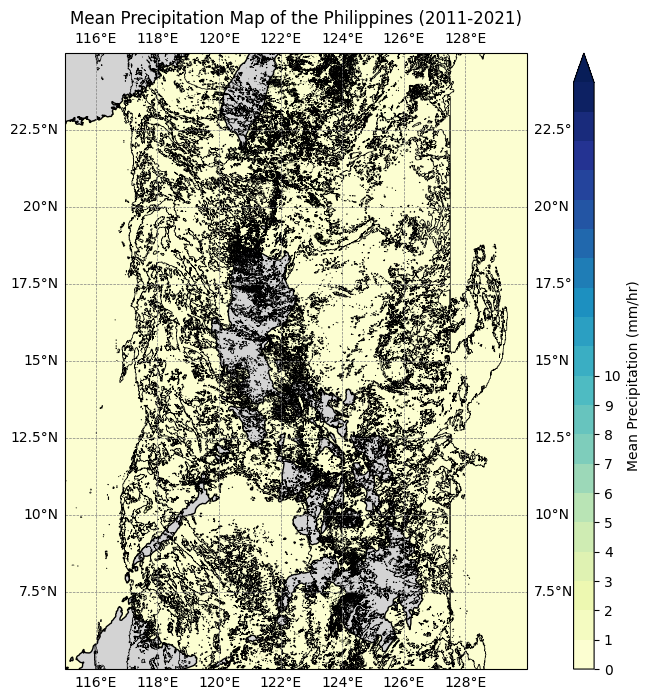

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os

# Function to read and extract precipitation data from an HDF5 file
def extract_precipitation_data(file_path):
    with h5py.File(file_path, 'r') as file:
        precipitation_data = file['Grid']['precipitationCal'][0]
    return precipitation_data

# Initialize an array to store the accumulated precipitation data
accumulated_precipitation = None

# Iterate through the HDF5 files in the folder and accumulate precipitation data
for filename in os.listdir(folder_path):
    if filename.endswith('.HDF5'):
        file_path = os.path.join(folder_path, filename)
        precipitation_data = extract_precipitation_data(file_path)
        
        # Filter out invalid values (-9999.9)
        valid_data = np.where(precipitation_data != -9999.9, precipitation_data, 0)
        
        # Accumulate the precipitation data
        if accumulated_precipitation is None:
            accumulated_precipitation = valid_data
        else:
            accumulated_precipitation += valid_data

# Calculate the mean precipitation over the 10-year period (in mm/hr)
mean_precipitation = accumulated_precipitation / 10.0

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Define contour levels and colormap
levels = np.linspace(0, 20, 21)  # Adjust the range and number of levels as needed
cmap = plt.get_cmap('YlGnBu')    # Choose an appropriate colormap

# Create a land mask to remove colors outside the Philippines
land_mask = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='10m',
    edgecolor='face',
    facecolor='none'
)

# Add land feature for reference and apply land mask to contour plot
ax.add_feature(land_mask, edgecolor='black', facecolor='lightgray')
contour = ax.contourf(
    np.linspace(115, 130, mean_precipitation.shape[1]),  # Longitudes
    np.linspace(5, 25, mean_precipitation.shape[0]),    # Latitudes
    mean_precipitation,
    levels=levels,
    cmap=cmap,
    extend='max',  # Add color for values above the highest contour level
    transform=ccrs.PlateCarree()
)

# Add contour lines for land only
contour_lines = ax.contour(
    contour, levels=levels, colors='k', linewidths=0.5, linestyles='solid', transform=ccrs.PlateCarree()
)

# Add colorbar with lower values
lower_levels = np.linspace(0, 10, 11)  # Adjust the lower range and number of levels as needed
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, ticks=lower_levels)
cbar.set_label('Mean Precipitation (mm/hr)')
cbar.set_ticks(lower_levels)
cbar.set_ticklabels([str(int(level)) for level in lower_levels])

# Set plot title and labels
ax.set_title('Mean Precipitation Map of the Philippines (2011-2021)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a grid for better reference
ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


### 1 Average rainfall (mm/hr) precipitation map for the span of five days in 0100 UTC (5 HDF5 files will be average since the datasets is in hourly)

In [10]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [11]:
# Define the folder path where your HDF5 files are located
folder_path = r'E:\My Project\0100 UTC'
# Debugging: Print the list of files in the directory
print(os.listdir(folder_path))

['3B-HHR.MS.MRG.3IMERG.20171201-S010000-E012959.0060.V06B.HDF5', '3B-HHR.MS.MRG.3IMERG.20171202-S010000-E012959.0060.V06B.HDF5', '3B-HHR.MS.MRG.3IMERG.20171203-S010000-E012959.0060.V06B.HDF5', '3B-HHR.MS.MRG.3IMERG.20171204-S010000-E012959.0060.V06B.HDF5', '3B-HHR.MS.MRG.3IMERG.20171205-S010000-E012959.0060.V06B.HDF5']


In [12]:
# Function to recursively read and print data from all datasets in an HDF5 group
def read_hdf5_group(group, indent=""):
    for key, item in group.items():
        if isinstance(item, h5py.Group):
            print(indent + f"Group: {key}")
            read_hdf5_group(item, indent + "  ")
        elif isinstance(item, h5py.Dataset):
            print(indent + f"Dataset: {key}")
            print(indent + f"Shape: {item.shape}")
            print(indent + f"Dtype: {item.dtype}")
            print(indent + f"Data:\n{item[()]}")
            print("-" * 30)

# Function to read and print data from an HDF5 file
def read_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as file:
        print("File:", file_path)
        read_hdf5_group(file)

# Iterate through the HDF5 files in the folder and read and print their data
for filename in os.listdir(folder_path):
    if filename.endswith('.HDF5'):
        file_path = os.path.join(folder_path, filename)
        read_hdf5_file(file_path)
        print("=" * 50)


File: E:\My Project\0100 UTC\3B-HHR.MS.MRG.3IMERG.20171201-S010000-E012959.0060.V06B.HDF5
Group: Grid
  Dataset: nv
  Shape: (2,)
  Dtype: int32
  Data:
[0 0]
------------------------------
  Dataset: lonv
  Shape: (2,)
  Dtype: int32
  Data:
[0 0]
------------------------------
  Dataset: latv
  Shape: (2,)
  Dtype: int32
  Data:
[0 0]
------------------------------
  Dataset: time
  Shape: (1,)
  Dtype: int32
  Data:
[1512090000]
------------------------------
  Dataset: lon
  Shape: (3600,)
  Dtype: float32
  Data:
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
------------------------------
  Dataset: lat
  Shape: (1800,)
  Dtype: float32
  Data:
[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
------------------------------
  Dataset: time_bnds
  Shape: (1, 2)
  Dtype: int32
  Data:
[[1512090000 1512091800]]
------------------------------
  Dataset: lon_bnds
  Shape: (3600, 2)
  Dtype: float32
  Data:
[[-180.      -179.9    ]
 [-179.90001 -179.8    ]
 [-179.8     -179.7    ]

In [13]:
# Function to read and preprocess the data from an HDF5 file
def preprocess_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as file:
        # Extract the precipitation data
        precipitation_data = file['Grid']['precipitationCal'][0]

        # Replace invalid values with NaN (e.g., -9999.9)
        precipitation_data[precipitation_data == -9999.9] = np.nan

        return precipitation_data

# Initialize an empty array to store the precipitation data from all files
all_precipitation_data = []

# Iterate through the HDF5 files in the folder and preprocess them
for filename in os.listdir(folder_path):
    if filename.endswith('.HDF5'):
        file_path = os.path.join(folder_path, filename)
        precipitation_data = preprocess_hdf5_file(file_path)
        all_precipitation_data.append(precipitation_data)

# Calculate the mean precipitation for the span of five days at 0000 UTC
# You can modify this part according to your specific requirements
mean_precipitation = np.nanmean(all_precipitation_data, axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_3836\3361806369.py:24: RuntimeWarning: Mean of empty slice
  mean_precipitation = np.nanmean(all_precipitation_data, axis=0)


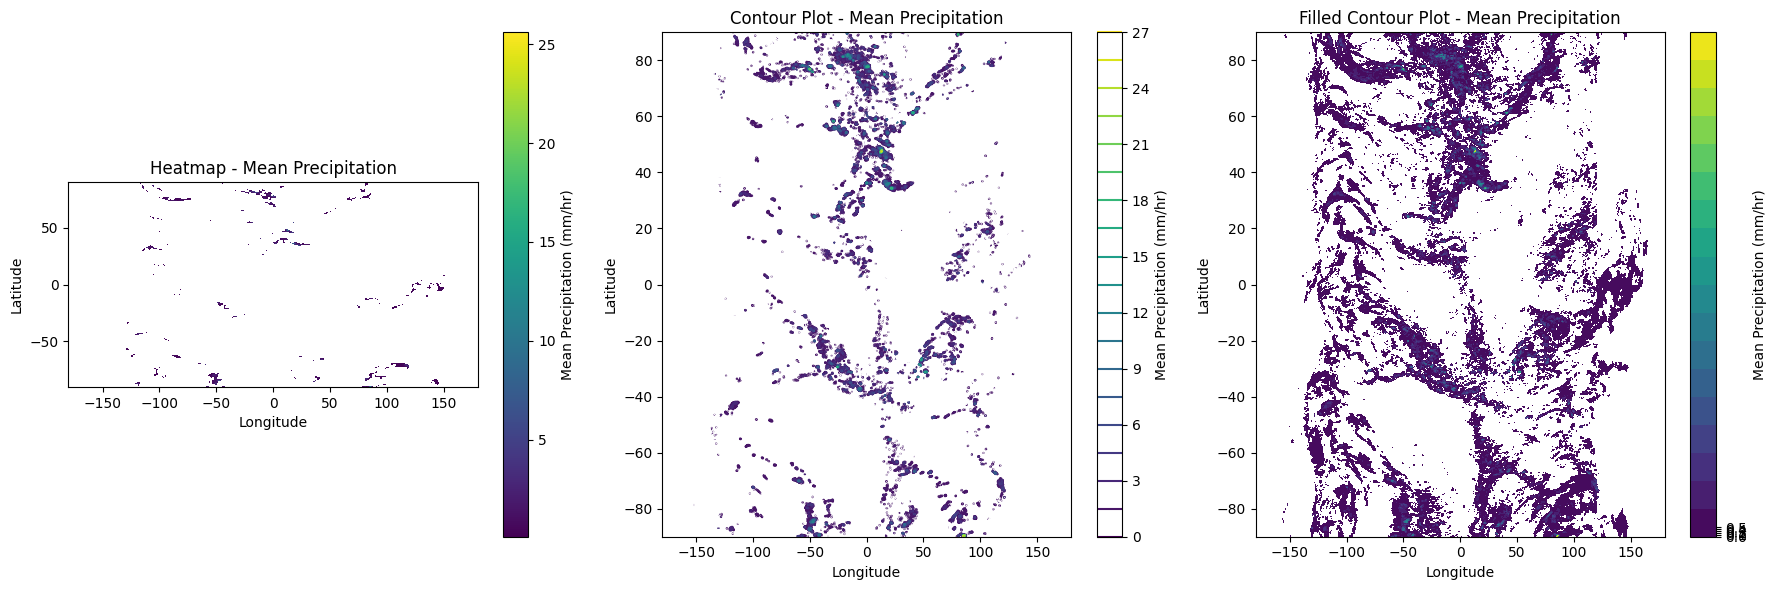

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 'mean_precipitation' data defined previously
# You can add a mask to exclude values below a certain threshold (e.g., for ocean)
threshold = 0.1  # Adjust this threshold value as needed
mean_precipitation_masked = np.ma.masked_where(mean_precipitation < threshold, mean_precipitation)

# Create subplots for different visualization styles
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Heatmap with proper extent
im = axs[0].imshow(mean_precipitation_masked, cmap='viridis', origin='lower', extent=[-180, 180, -90, 90])
axs[0].set_title('Heatmap - Mean Precipitation')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
plt.colorbar(im, ax=axs[0], label='Mean Precipitation (mm/hr)')

# Contour plot with specified levels
contour = axs[1].contour(np.linspace(-180, 180, mean_precipitation.shape[1]),
                        np.linspace(-90, 90, mean_precipitation.shape[0]),
                        mean_precipitation_masked, cmap='viridis', levels=20)
axs[1].set_title('Contour Plot - Mean Precipitation')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
plt.colorbar(contour, ax=axs[1], label='Mean Precipitation (mm/hr)')

# Filled contour plot with specified levels
filled_contour = axs[2].contourf(np.linspace(-180, 180, mean_precipitation.shape[1]),
                                np.linspace(-90, 90, mean_precipitation.shape[0]),
                                mean_precipitation_masked, cmap='viridis', levels=20)
axs[2].set_title('Filled Contour Plot - Mean Precipitation')
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')
colorbar = plt.colorbar(filled_contour, ax=axs[2], label='Mean Precipitation (mm/hr)')

# Adjust colorbar levels
colorbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])  # Adjust the tick values as needed

plt.tight_layout()
plt.show()


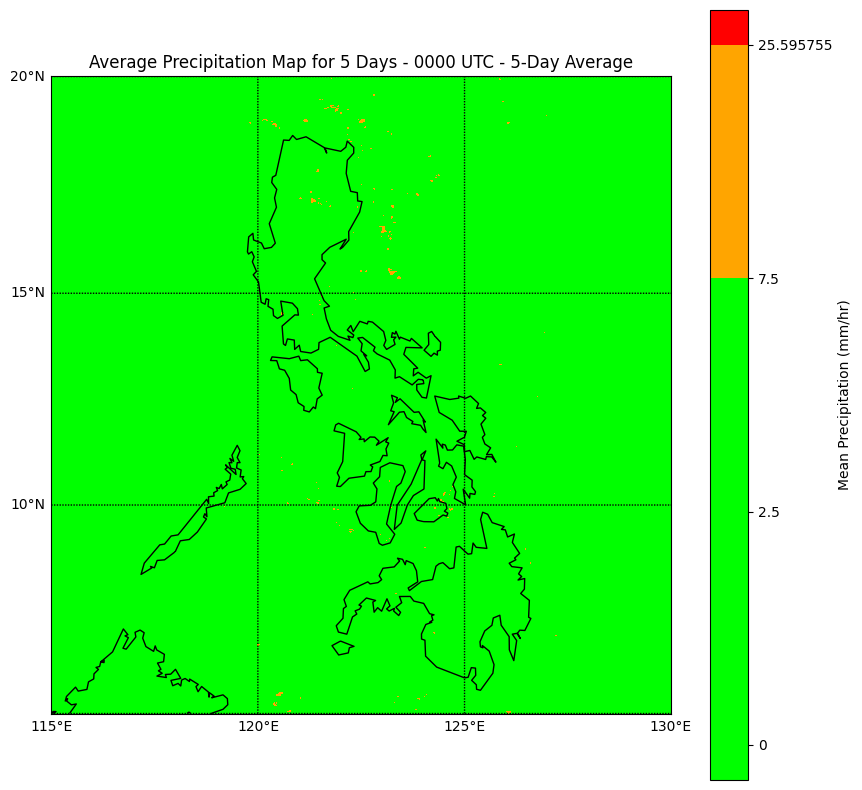

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import h5py
import os
from matplotlib.colors import ListedColormap

# Folder path containing HDF5 files
folder_path = r'E:\My Project\0100 UTC'
file_names = [
    '3B-HHR.MS.MRG.3IMERG.20171201-S010000-E012959.0060.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171202-S010000-E012959.0060.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171203-S010000-E012959.0060.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171204-S010000-E012959.0060.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171205-S010000-E012959.0060.V06B.HDF5'
]

# Create a Basemap centered on the Philippines
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', resolution='l',
            llcrnrlat=5, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=130)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Draw parallels and meridians
m.drawparallels(np.arange(0, 30, 5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(110, 140, 5), labels=[0, 0, 0, 1])

# Initialize variables to store cumulative data and count
cumulative_data = None
count = 0

# Loop through HDF5 files and accumulate data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as hdf_file:
        # Assuming that the dataset you want to plot is named 'precipitationCal'
        dataset = hdf_file['Grid']['precipitationCal'][0]

    if cumulative_data is None:
        cumulative_data = dataset
    else:
        cumulative_data += dataset

    count += 1

# Calculate the average by dividing the cumulative data by the count
average_data = cumulative_data / count

# Convert longitude and latitude to map coordinates
lon, lat = np.meshgrid(np.linspace(115, 130, average_data.shape[1]),
                       np.linspace(5, 20, average_data.shape[0]))
x, y = m(lon, lat)

# Create a land mask
land_mask = m.drawlsmask(land_color='lightblue', ocean_color='white', resolution='l')

# Create a mask for the Philippines' land
philippines_land_mask = np.ma.masked_where(land_mask == 0, land_mask)

# Apply the land mask to the average data
masked_data = np.ma.masked_where(philippines_land_mask.mask, average_data)

# Create a custom colormap with orange and red hues
colors = ['#00FF00', '#FFA500', '#FF0000']
cmap = ListedColormap(colors)

# Define custom levels for the colorbar
levels = [0, 2.5, 7.5, np.max(average_data)]

# Plot the average data on the map with contours only on the Philippines' land
c = m.contourf(x, y, masked_data, cmap=cmap, levels=levels, extend='both', vmin=0, vmax=np.max(average_data))

# Add a colorbar with custom levels and label
cbar = plt.colorbar(c, label='Mean Precipitation (mm/hr)', extendrect=True, ticks=levels)
cbar.set_ticklabels(levels)  # Customize colorbar tick labels

# Display the title for the average data
plt.title(f'Average Precipitation Map for {count} Days - 0000 UTC - 5-Day Average')

# Save the plot if needed
# plt.savefig('average_precipitation_map.png')

# Show the plot
plt.show()


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


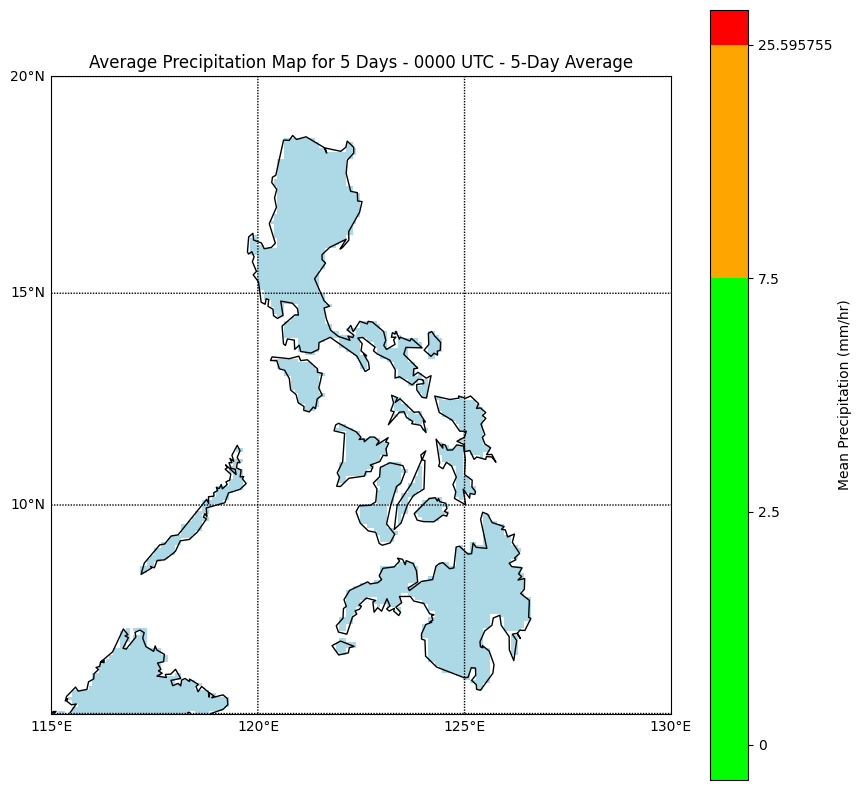

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import h5py
import os
import geopandas as gpd
from shapely.geometry import Polygon, Point
from matplotlib.colors import ListedColormap

# Load the shapefile data for land cover and water bodies
land_cover_shp = gpd.read_file('E:\My Project/Land-Cover.shp')
water_body_shp = gpd.read_file('E:\My Project/Philippine_WaterBody.shp')

# Folder path containing HDF5 files
folder_path = r'E:\My Project\0100 UTC'
file_names = [
    '3B-HHR.MS.MRG.3IMERG.20171201-S010000-E012959.0060.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171202-S010000-E012959.0060.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171203-S010000-E012959.0060.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171204-S010000-E012959.0060.V06B.HDF5',
    '3B-HHR.MS.MRG.3IMERG.20171205-S010000-E012959.0060.V06B.HDF5'
]
# Create a Basemap centered on the Philippines
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', resolution='l',
            llcrnrlat=5, urcrnrlat=20,
            llcrnrlon=115, urcrnrlon=130)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Draw parallels and meridians
m.drawparallels(np.arange(0, 30, 5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(110, 140, 5), labels=[0, 0, 0, 1])

# Initialize variables to store cumulative data and count
cumulative_data = None
count = 0

# Create a land mask for the Philippines only
philippines_polygon = Polygon([
    (117, 5), (117, 20), (130, 20), (130, 5)  # Define the corners of the Philippines' bounding box
])
land_mask = m.drawlsmask(land_color='lightblue', ocean_color='white', resolution='l')
mask_points = [Point(m(x_val, y_val)) for x_val, y_val in zip(m.boundarylons, m.boundarylats)]
mask = np.array([philippines_polygon.contains(point) for point in mask_points])

# Loop through HDF5 files and accumulate data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as hdf_file:
        # Assuming that the dataset you want to plot is named 'precipitationCal'
        dataset = hdf_file['Grid']['precipitationCal'][0]

    if cumulative_data is None:
        cumulative_data = np.zeros_like(dataset)
    cumulative_data += dataset

    count += 1

# Calculate the average by dividing the cumulative data by the count
average_data = cumulative_data / count

# Create a mask with the same shape as the data
mask_data = np.ones_like(average_data)
lon, lat = np.meshgrid(np.linspace(115, 130, mask_data.shape[1]),
                       np.linspace(5, 20, mask_data.shape[0]))
x, y = m(lon, lat)
mask_points = [Point(x_val, y_val) for x_val, y_val in zip(x.ravel(), y.ravel())]
mask = np.array([philippines_polygon.contains(point) for point in mask_points])
mask_data[mask.reshape(mask_data.shape)] = 0  # Set values inside the Philippines to 0, outside to 1
masked_data = np.ma.masked_where(mask_data == 1, average_data)

# Create a custom colormap with orange and red hues
colors = ['#00FF00', '#FFA500', '#FF0000']
cmap = ListedColormap(colors)

# Define custom levels for the colorbar
levels = [0, 2.5, 7.5, np.max(average_data)]

# Convert longitude and latitude to map coordinates
lon, lat = np.meshgrid(np.linspace(115, 130, masked_data.shape[1]),
                       np.linspace(5, 20, masked_data.shape[0]))
x, y = m(lon, lat)

# Plot the average data on the map with contours only within the Philippines' boundaries
c = m.contourf(x, y, masked_data, cmap=cmap, levels=levels, extend='both', vmin=0, vmax=np.max(average_data))

# Overlay land cover and water bodies on the map
land_cover_shp.plot(ax=plt.gca(), facecolor='none', edgecolor='green')
water_body_shp.plot(ax=plt.gca(), facecolor='none', edgecolor='blue')

# Add a colorbar with custom levels and label
cbar = plt.colorbar(c, label='Mean Precipitation (mm/hr)', extendrect=True, ticks=levels)
cbar.set_ticklabels(levels)  # Customize colorbar tick labels

# Display the title for the average data
plt.title(f'Average Precipitation Map for {count} Days - 0000 UTC - 5-Day Average')

# Show the plot
plt.show()

In [17]:
#import numpy as np
#import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
#import h5py
#import os

# Folder path containing HDF5 files
#folder_path = r'E:\My Project\0100 UTC'
#file_names = [
#    '3B-HHR.MS.MRG.3IMERG.20171201-S000000-E002959.0000.V06B.HDF5',
#    '3B-HHR.MS.MRG.3IMERG.20171202-S000000-E002959.0000.V06B.HDF5',
#    '3B-HHR.MS.MRG.3IMERG.20171203-S000000-E002959.0000.V06B.HDF5',
#    '3B-HHR.MS.MRG.3IMERG.20171204-S000000-E002959.0000.V06B.HDF5',
#    '3B-HHR.MS.MRG.3IMERG.20171205-S000000-E002959.0000.V06B.HDF5'
#]

# Create a Basemap centered on the Philippines
#plt.figure(figsize=(10, 10))
#m = Basemap(projection='merc', resolution='l',
#            llcrnrlat=5, urcrnrlat=20,
#            llcrnrlon=115, urcrnrlon=130)

# Draw coastlines and countries
#m.drawcoastlines()
#m.drawcountries()

# Draw parallels and meridians
#m.drawparallels(np.arange(0, 30, 5), labels=[1, 0, 0, 0])
#m.drawmeridians(np.arange(110, 140, 5), labels=[0, 0, 0, 1])

# Initialize variables to store cumulative data and count
#cumulative_data = None
#count = 0

# Loop through HDF5 files and accumulate data
#for file_name in file_names:
    #file_path = os.path.join(folder_path, file_name)

    # Open the HDF5 file
    #with h5py.File(file_path, 'r') as hdf_file:
        # Assuming that the dataset you want to plot is named 'precipitationCal'
     #   dataset = hdf_file['Grid']['precipitationCal'][0]
    
    #if cumulative_data is None:
    #    cumulative_data = dataset
   # else:
  #      cumulative_data += dataset
    
 #   count += 1

# Calculate the average by dividing the cumulative data by the count
#average_data = cumulative_data / count

# Convert longitude and latitude to map coordinates
#lon, lat = np.meshgrid(np.linspace(115, 130, average_data.shape[1]),
                       #np.linspace(5, 20, average_data.shape[0]))
#x, y = m(lon, lat)

# Create a land mask
#land_mask = m.drawlsmask(land_color='white', ocean_color='lightblue', resolution='l')

# Apply the land mask to the average data
#masked_data = np.ma.masked_where(land_mask == 0, average_data)

# Plot the average data on the map with contours only on land
#c = m.contourf(x, y, masked_data, cmap='viridis', levels=np.arange(0, 2.5, 0.25), extend='both', vmin=0, vmax=2.5)

# Add a colorbar with custom levels and label
#cbar = plt.colorbar(c, label='Mean Precipitation (mm/hr)', extendrect=True, ticks=np.arange(0, 2.5, 0.25))
#cbar.set_ticklabels(np.arange(0, 2.5, 0.25))  # Customize colorbar tick labels

# Display the title for the average data
#plt.title(f'Average Precipitation Map for {count} Days - 0000 UTC - 5-Day Average')

# Save the plot if needed
# plt.savefig('average_precipitation_map_2.png')

# Show the plot
#plt.show()


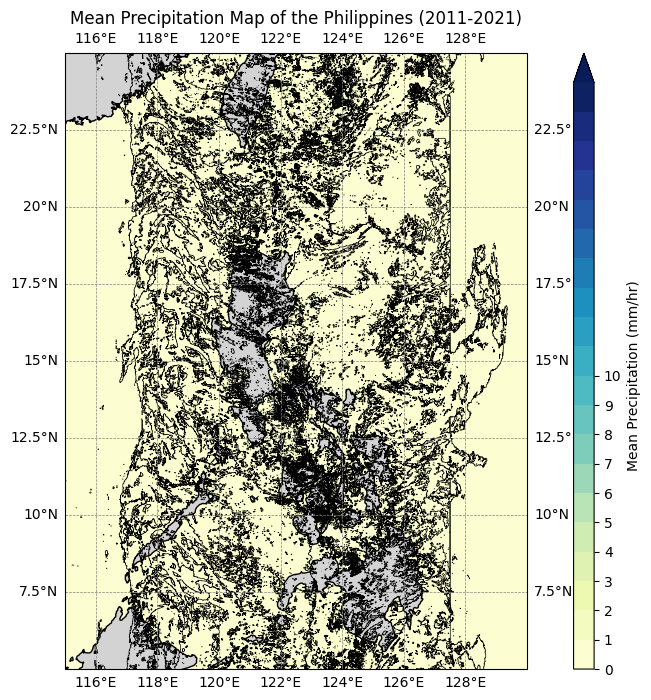

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os

# Function to read and extract precipitation data from an HDF5 file
def extract_precipitation_data(file_path):
    with h5py.File(file_path, 'r') as file:
        precipitation_data = file['Grid']['precipitationCal'][0]
    return precipitation_data

# Initialize an array to store the accumulated precipitation data
accumulated_precipitation = None

# Iterate through the HDF5 files in the folder and accumulate precipitation data
for filename in os.listdir(folder_path):
    if filename.endswith('.HDF5'):
        file_path = os.path.join(folder_path, filename)
        precipitation_data = extract_precipitation_data(file_path)
        
        # Filter out invalid values (-9999.9)
        valid_data = np.where(precipitation_data != -9999.9, precipitation_data, 0)
        
        # Accumulate the precipitation data
        if accumulated_precipitation is None:
            accumulated_precipitation = valid_data
        else:
            accumulated_precipitation += valid_data

# Calculate the mean precipitation over the 10-year period (in mm/hr)
mean_precipitation = accumulated_precipitation / 10.0

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Define contour levels and colormap
levels = np.linspace(0, 20, 21)  # Adjust the range and number of levels as needed
cmap = plt.get_cmap('YlGnBu')    # Choose an appropriate colormap

# Create a land mask to remove colors outside the Philippines
land_mask = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='10m',
    edgecolor='face',
    facecolor='none'
)

# Add land feature for reference and apply land mask to contour plot
ax.add_feature(land_mask, edgecolor='black', facecolor='lightgray')
contour = ax.contourf(
    np.linspace(115, 130, mean_precipitation.shape[1]),  # Longitudes
    np.linspace(5, 25, mean_precipitation.shape[0]),    # Latitudes
    mean_precipitation,
    levels=levels,
    cmap=cmap,
    extend='max',  # Add color for values above the highest contour level
    transform=ccrs.PlateCarree()
)

# Add contour lines for land only
contour_lines = ax.contour(
    contour, levels=levels, colors='k', linewidths=0.5, linestyles='solid', transform=ccrs.PlateCarree()
)

# Add colorbar with lower values
lower_levels = np.linspace(0, 10, 11)  # Adjust the lower range and number of levels as needed
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, ticks=lower_levels)
cbar.set_label('Mean Precipitation (mm/hr)')
cbar.set_ticks(lower_levels)
cbar.set_ticklabels([str(int(level)) for level in lower_levels])

# Set plot title and labels
ax.set_title('Mean Precipitation Map of the Philippines (2011-2021)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a grid for better reference
ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()
